In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
print(os.listdir(capstone_dir))

['LevelFilm 2.xlsx', 'LevelFilm 3.xlsx', 'LevelFilm 1.xlsx', 'LevelFilm 4.xlsx', 'LevelFilm 5.xlsx', 'LevelFilm 6.xlsx', 'LevelFilm 7.xlsx', 'LevelFilm 8.xlsx', 'LevelFilm 9.xlsx', 'LevelFilm 10.xlsx', '804 Capstone LevelFilm_Sam.ipynb', 'LevelFilm 11.xlsx', 'LevelFilm 12.xlsx', 'Movies 1.csv', 'LevelFilm 13.xlsx', 'Credits 1.csv', 'Movies 2 - Copy.csv', 'Movies 2.csv']


In [ ]:
import pandas as pd
import os

# 1. Point to your mounted Drive folder
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'

# 2. (Optional) List files to confirm the exact name
print("Files here:", os.listdir(capstone_dir))

# 3. Build the full path and read the CSV
file_path = os.path.join(capstone_dir, 'Movies 2.csv')
movies_df = pd.read_csv(file_path)

# 4. Peek at the data
movies_df.info()
movies_df.head()

Files here: ['LevelFilm 2.xlsx', 'LevelFilm 3.xlsx', 'LevelFilm 1.xlsx', 'LevelFilm 4.xlsx', 'LevelFilm 5.xlsx', 'LevelFilm 6.xlsx', 'LevelFilm 7.xlsx', 'LevelFilm 8.xlsx', 'LevelFilm 9.xlsx', 'LevelFilm 10.xlsx', '804 Capstone LevelFilm_Sam.ipynb', 'LevelFilm 11.xlsx', 'LevelFilm 12.xlsx', 'Movies 1.csv', 'LevelFilm 13.xlsx', 'Credits 1.csv', 'Movies 2 - Copy.csv', 'Movies 2.csv']


<ipython-input-3-ae34e7cbff38>:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Original Title  45466 non-null  object 
 1   Language        45455 non-null  object 
 2   Country         45463 non-null  object 
 3   Studio          45463 non-null  object 
 4   Series          4494 non-null   object 
 5   IMDb ID         45449 non-null  object 
 6   Vote Average    45460 non-null  float64
 7   Vote Count      45460 non-null  float64
 8   Popularity      45461 non-null  object 
 9   Runtime         45203 non-null  float64
 10  Release Date    45379 non-null  object 
 11  Budget          45466 non-null  object 
 12  Revenue         45460 non-null  float64
 13  status          45379 non-null  object 
 14  video           45460 non-null  object 
 15  title           45460 non-null  object 
 16  ID              45466 non-null  object 
dtypes: float64(4), object(13)
memor

,Original Title,Language,Country,Studio,Series,IMDb ID,Vote Average,Vote Count,Popularity,Runtime,Release Date,Budget,Revenue,status,video,title,ID
0,Toy Story,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Pixar Animation Studios', 'id': 3}]","{'id': 10194, 'name': 'Toy Story Collection', ...",tt0114709,7.7,5415.0,21.946943,81.0,10/30/1995,30000000,373554033.0,Released,False,Toy Story,862
1,Jumanji,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",NaN,tt0113497,6.9,2413.0,17.015539,104.0,12/15/1995,65000000,262797249.0,Released,False,Jumanji,8844
2,Grumpier Old Men,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","{'id': 119050, 'name': 'Grumpy Old Men Collect...",tt0113228,6.5,92.0,11.7129,101.0,12/22/1995,0,0.0,Released,False,Grumpier Old Men,15602
3,Waiting to Exhale,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",[{'name': 'Twentieth Century Fox Film Corporat...,NaN,tt0114885,6.1,34.0,3.859495,127.0,12/22/1995,16000000,81452156.0,Released,False,Waiting to Exhale,31357
4,Father of the Bride Part II,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Sandollar Productions', 'id': 5842}...","{'id': 96871, 'name': 'Father of the Bride Col...",tt0113041,5.7,173.0,8.387519,106.0,2/10/1995,0,76578911.0,Released,False,Father of the Bride Part II,11862


In [ ]:
import pandas as pd

# 1. Ensure Budget is numeric (coerce non‑numbers to NaN)
movies_df['Budget'] = pd.to_numeric(movies_df['Budget'], errors='coerce')

# 2. Drop rows where Budget or Revenue is NaN
movies_df = movies_df.dropna(subset=['Budget', 'Revenue'])

# 3. Filter out rows where Budget or Revenue equals zero
movies_df = movies_df[(movies_df['Budget'] > 0) & (movies_df['Revenue'] > 0)].copy()

# 4. (Optional) Reset the index
movies_df.reset_index(drop=True, inplace=True)

# 5. Check
print(movies_df.shape)
movies_df[['Budget','Revenue']].describe()


(5381, 17)


,Budget,Revenue
count,5.381000e+03,5.381000e+03
mean,3.109480e+07,9.031812e+07
std,4.016263e+07,1.661423e+08
min,1.000000e+00,1.000000e+00
25%,5.037000e+06,7.011317e+06
50%,1.700000e+07,2.991874e+07
75%,4.000000e+07,9.996575e+07
max,3.800000e+08,2.787965e+09


In [ ]:
# 1. Show all unique statuses
print("Unique statuses:", movies_df['status'].unique())

# 2. Count frequency of each status (including NaN if any)
status_counts = movies_df['status'].value_counts(dropna=False)
print("\nStatus value counts:")
print(status_counts)

Unique statuses: ['Released' 'Rumored' 'Post Production']

Status value counts:
status
Released           5377
Rumored               2
Post Production       2
Name: count, dtype: int64


In [ ]:
# Video column frequencies
print("Video value counts:")
print(movies_df['video'].value_counts(dropna=False))

# Title column frequencies
print("\nTitle value counts (top 20):")
print(movies_df['title'].value_counts(dropna=False).head(20))


Video value counts:
video
False    5381
Name: count, dtype: int64

Title value counts (top 20):
title
Beauty and the Beast             3
King Kong                        3
Alone in the Dark                2
Black Gold                       2
The King and I                   2
Pokémon: Spell of the Unknown    2
The Illusionist                  2
Bulletproof                      2
The Thing                        2
Dracula                          2
Robin Hood                       2
Titanic                          2
Carrie                           2
A Nightmare on Elm Street        2
The Omen                         2
Dawn of the Dead                 2
The Magnificent Seven            2
Arthur                           2
A Farewell to Arms               2
Doctor Dolittle                  2
Name: count, dtype: int64


In [ ]:
# Drop the 'status', 'video', and 'title' columns in one go
movies_df.drop(columns=['status', 'video', 'title'], inplace=True)

# Verify the columns have been removed
print(movies_df.columns)


Index(['Original Title', 'Language', 'Country', 'Studio', 'Series', 'IMDb ID',
       'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date',
       'Budget', 'Revenue', 'ID'],
      dtype='object')


In [ ]:
import os

# Build the output path
output_path = os.path.join(capstone_dir, 'Movies 3.csv')

# Save the cleaned DataFrame without the dropped columns
movies_df.to_csv(output_path, index=False)

print(f"Saved cleaned data to: {output_path}")


Saved cleaned data to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 3.csv


In [ ]:
import pandas as pd
import os

# Define the path to your cleaned Movies 3 file
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path = os.path.join(capstone_dir, 'Movies 3.csv')

# Read the CSV into a DataFrame
movies3_df = pd.read_csv(file_path)

# Display the column names
print("Columns in Movies 3.csv:")
print(movies3_df.columns.tolist())




Columns in Movies 3.csv:
['Original Title', 'Language', 'Country', 'Studio', 'Series', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID']


In [ ]:
# 1. Quick shape & columns list
print("Shape:", movies3_df.shape)

# 2. Detailed info (non‑null counts & dtypes)
movies3_df.info()

# 3. Just the dtypes if you want a cleaner view
print("\nData types:")
print(movies3_df.dtypes)


Shape: (5381, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5381 entries, 0 to 5380
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Original Title  5381 non-null   object 
 1   Language        5381 non-null   object 
 2   Country         5381 non-null   object 
 3   Studio          5381 non-null   object 
 4   Series          1224 non-null   object 
 5   IMDb ID         5381 non-null   object 
 6   Vote Average    5381 non-null   float64
 7   Vote Count      5381 non-null   float64
 8   Popularity      5381 non-null   float64
 9   Runtime         5380 non-null   float64
 10  Release Date    5381 non-null   object 
 11  Budget          5381 non-null   float64
 12  Revenue         5381 non-null   float64
 13  ID              5381 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 588.7+ KB

Data types:
Original Title     object
Language           object
Country            object


In [ ]:
import pandas as pd

# 3. (Optional) Combine into one table with percentages
col_info = pd.DataFrame({
    'dtype': movies3_df.dtypes,
    'missing_count': missing_counts,
    'missing_pct': (missing_counts / len(movies3_df) * 100).round(2)
})
print("\nColumn info (dtype, missing count & %):")
print(col_info)



Column info (dtype, missing count & %):
                  dtype  missing_count  missing_pct
Original Title   object              0         0.00
Language         object              0         0.00
Country          object              0         0.00
Studio           object              0         0.00
Series           object           4157        77.25
IMDb ID          object              0         0.00
Vote Average    float64              0         0.00
Vote Count      float64              0         0.00
Popularity      float64              0         0.00
Runtime         float64              1         0.02
Release Date     object              0         0.00
Budget          float64              0         0.00
Revenue         float64              0         0.00
ID                int64              0         0.00


In [ ]:
import pandas as pd
import os

# Define the path to your Capstone folder
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'

# Build the full path for Credits 1.csv
credits_path = os.path.join(capstone_dir, 'Credits 1.csv')

# Read the CSV into a DataFrame
credits_df = pd.read_csv(credits_path)

# Display DataFrame info and first few rows
print("Credits 1 DataFrame Info:")
credits_df.info()




<ipython-input-19-df858e08105c>:11: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263

Credits 1 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45504 entries, 0 to 45503
Columns: 1696 entries, Cast to Unnamed: 1695
dtypes: float64(1), object(1695)
memory usage: 588.8+ MB


In [ ]:
# Read with low_memory=False to avoid dtype warnings
credits_df = pd.read_csv(credits_path, low_memory=False)

# 1. List of columns
columns = credits_df.columns.tolist()

# 2. Data types
dtypes = credits_df.dtypes

# 3. Missing values
missing_counts = credits_df.isnull().sum()
missing_pct = (missing_counts / len(credits_df) * 100).round(2)

# Combine into DataFrame
col_info = pd.DataFrame({
    'dtype': dtypes,
    'missing_count': missing_counts,
    'missing_pct': missing_pct
})

# Display results
print(f"Total columns: {len(columns)}")
print("First 20 columns:", columns[:20])
print("\nColumn info (first 20 rows):")
col_info.head(20)


Total columns: 1696
First 20 columns: ['Cast', 'Crew', 'ID', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']

Column info (first 20 rows):


,dtype,missing_count,missing_pct
Cast,object,1,0.00
Crew,object,11,0.02
ID,object,28,0.06
Unnamed: 3,object,45476,99.94
Unnamed: 4,object,45476,99.94
Unnamed: 5,object,45476,99.94
Unnamed: 6,object,45476,99.94
Unnamed: 7,object,45476,99.94
Unnamed: 8,object,45476,99.94
Unnamed: 9,object,45476,99.94


In [ ]:
credits_df = credits_df[['Cast', 'Crew', 'ID']].copy()
print("Remaining columns:", credits_df.columns.tolist())


Remaining columns: ['Cast', 'Crew', 'ID']


In [ ]:
import pandas as pd

# Assuming credits_df is already in your workspace

# 1. List columns
print("Columns:", credits_df.columns.tolist())

# 2. Data types and non-null counts
print("\nDataFrame info:")
credits_df.info()

# 3. Missing values count & percentage
missing_counts = credits_df.isnull().sum()
missing_pct = (missing_counts / len(credits_df) * 100).round(2)

col_info = pd.DataFrame({
    'dtype': credits_df.dtypes,
    'missing_count': missing_counts,
    'missing_pct': missing_pct
})

print("\nMissing‑value summary:")
print(col_info)


Columns: ['Cast', 'Crew', 'ID']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45504 entries, 0 to 45503
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Cast    45503 non-null  object
 1   Crew    45493 non-null  object
 2   ID      45476 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB

Missing‑value summary:
       dtype  missing_count  missing_pct
Cast  object              1         0.00
Crew  object             11         0.02
ID    object             28         0.06


In [ ]:
# Perform a left join: keep all rows from movies3_df, bring in Cast & Crew from credits_df where ID matches
merged_df = movies3_df.merge(credits_df, on='ID', how='left')

# Verify
print("Merged DataFrame shape:", merged_df.shape)
print("Columns:", merged_df.columns.tolist())

# Optional: preview
merged_df.head()


ValueError: You are trying to merge on int64 and object columns for key 'ID'. If you wish to proceed you should use pd.concat

In [ ]:
# 1. Align dtypes
movies3_df['ID']   = movies3_df['ID'].astype(str)
credits_df['ID']   = credits_df['ID'].astype(str)

# 2. Merge (left join on Movies 3)
merged_df = movies3_df.merge(
    credits_df[['ID','Cast','Crew']],
    on='ID',
    how='left'
)

# 3. Verify
print("Merged shape:", merged_df.shape)
print("Columns:", merged_df.columns.tolist())
merged_df.head()


Merged shape: (5393, 16)
Columns: ['Original Title', 'Language', 'Country', 'Studio', 'Series', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID', 'Cast', 'Crew']


,Original Title,Language,Country,Studio,Series,IMDb ID,Vote Average,Vote Count,Popularity,Runtime,Release Date,Budget,Revenue,ID,Cast,Crew
0,Toy Story,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Pixar Animation Studios', 'id': 3}]","{'id': 10194, 'name': 'Toy Story Collection', ...",tt0114709,7.7,5415.0,21.946943,81.0,10/30/1995,30000000.0,373554033.0,862,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,Jumanji,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",NaN,tt0113497,6.9,2413.0,17.015539,104.0,12/15/1995,65000000.0,262797249.0,8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,Waiting to Exhale,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",[{'name': 'Twentieth Century Fox Film Corporat...,NaN,tt0114885,6.1,34.0,3.859495,127.0,12/22/1995,16000000.0,81452156.0,31357,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
3,Heat,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Regency Enterprises', 'id': 508}, {...",NaN,tt0113277,7.7,1886.0,17.924927,170.0,12/15/1995,60000000.0,187436818.0,949,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
4,Sudden Death,en,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Universal Pictures', 'id': 33}, {'n...",NaN,tt0114576,5.5,174.0,5.231580,106.0,12/22/1995,35000000.0,64350171.0,9091,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de..."


In [ ]:
import pandas as pd
import os

# Define your Capstone directory if not already set
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'

# Reorder columns: insert 'Cast' and 'Crew' immediately after 'Series'
cols = merged_df.columns.tolist()
new_order = []
for col in cols:
    new_order.append(col)
    if col == 'Series':
        new_order.extend(['Cast', 'Crew'])
# Remove duplicates while preserving order
seen = set()
final_cols = []
for col in new_order:
    if col not in seen and col in merged_df.columns:
        seen.add(col)
        final_cols.append(col)

# Apply new column order
movies4_df = merged_df[final_cols]

# Save to Excel
output_path = os.path.join(capstone_dir, 'Movies 4.xlsx')
movies4_df.to_excel(output_path, index=False)

print(f"Saved reordered data to: {output_path}")


Saved reordered data to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 4.xlsx


In [ ]:
# 3. Display columns
print("Columns in Movies 4.xlsx:")
print(movies4_df.columns.tolist())

# 4. DataFrame info (dtypes & non-null counts)
print("\nDataFrame Info:")
movies4_df.info()

# 5. Missing values summary
missing_counts = movies4_df.isnull().sum()
missing_pct = (missing_counts / len(movies4_df) * 100).round(2)
col_info = pd.DataFrame({
    'dtype': movies4_df.dtypes,
    'missing_count': missing_counts,
    'missing_pct': missing_pct
})
print("\nMissing‑value summary:")
print(col_info)


Columns in Movies 4.xlsx:
['Original Title', 'Language', 'Country', 'Studio', 'Series', 'Cast', 'Crew', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID']

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5393 entries, 0 to 5392
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Original Title  5393 non-null   object 
 1   Language        5393 non-null   object 
 2   Country         5393 non-null   object 
 3   Studio          5393 non-null   object 
 4   Series          1226 non-null   object 
 5   Cast            5368 non-null   object 
 6   Crew            5368 non-null   object 
 7   IMDb ID         5393 non-null   object 
 8   Vote Average    5393 non-null   float64
 9   Vote Count      5393 non-null   float64
 10  Popularity      5393 non-null   float64
 11  Runtime         5392 non-null   float64
 12  Release Date    5393 non-nul

In [ ]:
# 4. Show unique languages
print("\nUnique languages:")
print(movies4_df['Language'].unique())

# 5. Show frequency counts for each language
print("\nLanguage value counts:")
print(movies4_df['Language'].value_counts(dropna=False))



Unique languages:
['en' 'fr' 'cn' 'ru' 'es' 'zh' 'sv' 'it' 'de' 'ja' 'fa' 'pt' 'xx' 'da'
 'ko' 'el' 'hi' 'pl' 'af' 'fi' 'th' 'nl' 'ro' 'vi' 'bm' 'he' 'no' 'ta'
 'sr' 'nb' 'ca' 'id' 'tr' 'ml' 'hu' 'kn' 'is' 'te' 'mr' 'ur']

Language value counts:
Language
en    4807
hi      99
fr      91
ru      70
ja      41
es      38
it      31
zh      29
ta      26
ko      25
de      22
cn      15
ml      11
da      11
sv       8
te       8
nl       7
pt       7
pl       4
no       4
he       4
ro       4
tr       4
fi       3
id       3
sr       3
ur       2
hu       2
th       2
xx       2
fa       1
el       1
vi       1
af       1
bm       1
nb       1
ca       1
kn       1
is       1
mr       1
Name: count, dtype: int64


In [ ]:
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
input_path  = os.path.join(capstone_dir, 'Movies 4.xlsx')
output_path = os.path.join(capstone_dir, 'Movies 5.xlsx')

# 3. Read in the existing Movies 4 file
movies_df = pd.read_excel(input_path)

# 4. Define the language mapping
language_mapping = {
    'en': 'English',
    'hi': 'Hindi',
    'fr': 'French',
    'ru': 'Russian',
    'ja': 'Japanese',
    'es': 'Spanish',
    'it': 'Italian',
    'zh': 'Chinese',
    'cn': 'Chinese',   # also map 'cn' → Chinese
    'ta': 'Tamil',
    'ko': 'Korean',
    'de': 'German',
    'ml': 'Malayalam',
    'da': 'Danish'
}

# 5. Apply the mapping, replacing codes with names and grouping the rest as 'Other'
movies_df['Language'] = (
    movies_df['Language']
      .map(language_mapping)
      .fillna('Other')
)

# 6. Verify the transformation
print("Updated language counts:")
print(movies_df['Language'].value_counts(dropna=False))

# 7. Save the updated DataFrame to a new Excel file
movies_df.to_excel(output_path, index=False)
print(f"\nSaved cleaned data with full language names to: {output_path}")


Updated language counts:
Language
English      4807
Hindi          99
French         91
Other          77
Russian        70
Chinese        44
Japanese       41
Spanish        38
Italian        31
Tamil          26
Korean         25
German         22
Danish         11
Malayalam      11
Name: count, dtype: int64

Saved cleaned data with full language names to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 5.xlsx


In [ ]:
# 2. Imports and path setup
import pandas as pd
import os

capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path = os.path.join(capstone_dir, 'Movies 5.xlsx')

# 3. Read the Excel file
movies5_df = pd.read_excel(file_path)

# 4. Show unique values in the Country column
print("Unique countries:")
print(movies5_df['Country'].unique())

# 5. Show frequency of each unique country entry
print("\nCountry value counts:")
print(movies5_df['Country'].value_counts(dropna=False))


Unique countries:
["[{'iso_3166_1': 'US', 'name': 'United States of America'}]"
 "[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"
 "[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"
 "[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"
 "[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'ES', 'name': 'Spain'}]"
 "[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"
 "[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]"
 "[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"
 "[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]"

In [ ]:
import pandas as pd
import ast
import os

# 1. Read in your Movies 5 data
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 5.xlsx')
df = pd.read_excel(file_path)

# 2. Function to parse the Country cell and extract the 'name' field
def extract_country_names(cell):
    try:
        # turn the string "[{…}, {…}]" into a Python list of dicts
        country_dicts = ast.literal_eval(cell)
        # pull out the full country names
        return [d.get('name') for d in country_dicts]
    except Exception:
        return []

# 3. Apply to create a list‑of‑names column
df['Country_Names'] = df['Country'].apply(extract_country_names)

# 4a. If you want **only the primary country** (first in the list):
df['Primary_Country'] = df['Country_Names'].apply(lambda lst: lst[0] if lst else None)

# 4b. If you want **all countries** as a single semicolon‑separated string:
df['All_Countries'] = df['Country_Names'].apply(lambda lst: '; '.join(lst))

# 5. Verify
print("Sample Country_Names lists:")
print(df[['Country', 'Country_Names']].head(), '\n')

print("Primary Country value counts:")
print(df['Primary_Country'].value_counts().head(), '\n')

print("All_Countries unique examples:")
print(df['All_Countries'].drop_duplicates().head())


Sample Country_Names lists:
                                             Country  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   

                Country_Names  
0  [United States of America]  
1  [United States of America]  
2  [United States of America]  
3  [United States of America]  
4  [United States of America]   

Primary Country value counts:
Primary_Country
United States of America    3453
United Kingdom               386
France                       219
Canada                       189
Germany                      181
Name: count, dtype: int64 

All_Countries unique examples:
0                             United States of America
5             United Kingdom; United States of America
8     France; Germany; Italy; United States of America
9     

In [ ]:
import pandas as pd
import ast
import os

# 1. Read in your Movies 5 data
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 5.xlsx')
df = pd.read_excel(file_path)

# 2. (Re‑)define the extractor if you haven’t already
def extract_country_names(cell):
    try:
        country_dicts = ast.literal_eval(cell)
        return [d.get('name') for d in country_dicts]
    except Exception:
        return []

df['Country_Names'] = df['Country'].apply(extract_country_names)

# 3. Define your replacement map
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom': 'UK'
}

# 4. Apply the mapping to each list
df['Country_Names'] = df['Country_Names'].apply(
    lambda lst: [country_mapping.get(name, name) for name in lst]
)

# 5. Recompute primary and all‑countries columns
df['Primary_Country'] = df['Country_Names'].apply(lambda lst: lst[0] if lst else None)
df['All_Countries']   = df['Country_Names'].apply(lambda lst: '; '.join(lst))

# 6. Verify the changes
print("Primary Country counts after renaming:")
print(df['Primary_Country'].value_counts().head(), "\n")

print("Sample All_Countries entries:")
print(df['All_Countries'].drop_duplicates().head())


Primary Country counts after renaming:
Primary_Country
USA        3453
UK          386
France      219
Canada      189
Germany     181
Name: count, dtype: int64 

Sample All_Countries entries:
0                             USA
5                         UK; USA
8     France; Germany; Italy; USA
9                     France; USA
18         France; Germany; Spain
Name: All_Countries, dtype: object


In [ ]:
# 1. Define the output path for Movies 6
output_path = os.path.join(capstone_dir, 'Movies 6.xlsx')

# 2. Save the DataFrame (with your renamed countries) to Excel
df.to_excel(output_path, index=False)
print(f"Saved cleaned data with updated country names to: {output_path}")

# 3. Show the current columns in df
print("Columns in Movies 6 DataFrame:")
print(df.columns.tolist())


Saved cleaned data with updated country names to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 6.xlsx
Columns in Movies 6 DataFrame:
['Original Title', 'Language', 'Country', 'Studio', 'Series', 'Cast', 'Crew', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID', 'Country_Names', 'Primary_Country', 'All_Countries']


In [ ]:
import pandas as pd
import os

# 1. Read in your Movies 6 file
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 6.xlsx')
df = pd.read_excel(file_path)

# 2. Country_Names (list‑of‑names) — counts of identical lists
print("=== Country_Names (list‑level) ===")
print(df['Country_Names'].value_counts(dropna=False), "\n")

# 3. Primary_Country — counts of each primary country
print("=== Primary_Country ===")
print(df['Primary_Country'].value_counts(dropna=False), "\n")

# 4. All_Countries — counts of each semicolon‑joined string
print("=== All_Countries ===")
print(df['All_Countries'].value_counts(dropna=False), "\n")

# 5. (Optional) To count each country occurrence across all films:
print("=== Individual country occurrences (exploded) ===")
print(df.explode('Country_Names')['Country_Names'].value_counts(dropna=False))


=== Country_Names (list‑level) ===
Country_Names
['USA']                                   3326
['UK', 'USA']                              208
['India']                                  154
['UK']                                     120
['Germany', 'USA']                         110
                                          ... 
['Bulgaria', 'USA', 'UK']                    1
['Canada', 'Germany']                        1
['Argentina', 'Colombia', 'Venezuela']       1
['India', 'China']                           1
['Denmark', 'USA']                           1
Name: count, Length: 500, dtype: int64 

=== Primary_Country ===
Primary_Country
USA             3453
UK               386
France           219
Canada           189
Germany          181
                ... 
Burkina Faso       1
Qatar              1
Pakistan           1
Cambodia           1
Malaysia           1
Name: count, Length: 62, dtype: int64 

=== All_Countries ===
All_Countries
USA                               3326
UK; USA

In [ ]:
import pandas as pd
import os

# 1. Read in Movies 6
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 6.xlsx')
df = pd.read_excel(file_path)

# 2. Drop the unwanted columns
df = df.drop(columns=['Country', 'Country_Names', 'All_Countries'])

# 3. (Optional) Save as Movies 7
output_path = os.path.join(capstone_dir, 'Movies 7.xlsx')
df.to_excel(output_path, index=False)
print(f"Saved cleaned data to: {output_path}")

# 4. Show remaining columns
print("Remaining columns:")
print(df.columns.tolist())


Saved cleaned data to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 7.xlsx
Remaining columns:
['Original Title', 'Language', 'Studio', 'Series', 'Cast', 'Crew', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID', 'Primary_Country']


In [ ]:
import pandas as pd
import os

# 1. Read in your Movies 7 file
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 7.xlsx')
df = pd.read_excel(file_path)

# 2. Show value counts for Primary_Country
primary_counts = df['Primary_Country'].value_counts(dropna=False)
print("Primary_Country value counts:")
print(primary_counts)


Primary_Country value counts:
Primary_Country
USA             3453
UK               386
France           219
Canada           189
Germany          181
                ... 
Burkina Faso       1
Qatar              1
Pakistan           1
Cambodia           1
Malaysia           1
Name: count, Length: 62, dtype: int64


In [ ]:
# 2. Imports and path setup
import pandas as pd
import os

capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
input_path   = os.path.join(capstone_dir, 'Movies 7.xlsx')
output_path  = os.path.join(capstone_dir, 'Movies 8.xlsx')

# 3. Read in Movies 7
df = pd.read_excel(input_path)

# 4. Rename 'Primary_Country' to 'Country'
df.rename(columns={'Primary_Country': 'Country'}, inplace=True)

# 5. Reorder columns: place 'Country' immediately after 'Language'
cols = df.columns.tolist()
new_order = []
for col in cols:
    new_order.append(col)
    if col == 'Language':
        new_order.append('Country')

# Remove duplicates while preserving order
seen = set()
final_cols = [c for c in new_order if not (c in seen or seen.add(c))]

df = df[final_cols]

# 6. Save as Movies 8
df.to_excel(output_path, index=False)
print(f"Saved updated file to: {output_path}")

# 7. Show resulting columns
print("Columns in Movies 8:")
print(df.columns.tolist())


Saved updated file to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 8.xlsx
Columns in Movies 8:
['Original Title', 'Language', 'Country', 'Studio', 'Series', 'Cast', 'Crew', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID']


In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Mount Drive (if not already)
drive.mount('/content/drive')

# 2. Define path and read Movies 8
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 8.xlsx')
df = pd.read_excel(file_path)

# 3. Peek at the first 10 entries of the Studio column
print("First 10 Studios:")
print(df['Studio'].head(10), "\n")

# 4. List unique Studio values (may be long)
print("Unique Studios:")
print(df['Studio'].unique(), "\n")

# 5. Frequency of each Studio
print("Studio value counts (top 20):")
print(df['Studio'].value_counts().head(20))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 10 Studios:
0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Twentieth Century Fox Film Corporat...
3    [{'name': 'Regency Enterprises', 'id': 508}, {...
4    [{'name': 'Universal Pictures', 'id': 33}, {'n...
5    [{'name': 'United Artists', 'id': 60}, {'name'...
6    [{'name': 'Columbia Pictures', 'id': 5}, {'nam...
7    [{'name': 'Hollywood Pictures', 'id': 915}, {'...
8    [{'name': 'Le Studio Canal+', 'id': 183}, {'na...
9    [{'name': 'Universal Pictures', 'id': 33}, {'n...
Name: Studio, dtype: object 

Unique Studios:
["[{'name': 'Pixar Animation Studios', 'id': 3}]"
 "[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Interscope Communications', 'id': 10201}]"
 "[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]" ...
 

In [ ]:
# 2. Imports and path setup
import pandas as pd
import ast
import os

capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
input_path   = os.path.join(capstone_dir, 'Movies 8.xlsx')
output_path  = os.path.join(capstone_dir, 'Movies 9.xlsx')

# 3. Read in Movies 8
df = pd.read_excel(input_path)

# 4. Extract the first (primary) studio name from the JSON-like string
def extract_primary_studio(cell):
    try:
        studios = ast.literal_eval(cell)
        return studios[0]['name'] if studios else None
    except Exception:
        return None

df['Primary_Studio'] = df['Studio'].apply(extract_primary_studio)

# 5. Define the mapping of full names → short names
studio_mapping = {
    'Paramount Pictures':                     'Paramount',
    'Universal Pictures':                     'Universal',
    'Metro-Goldwyn-Mayer (MGM)':              'MGM',
    'Warner Bros.':                           'Warner Bros',
    'Twentieth Century Fox Film Corporation': '20th Century Fox',
    'Columbia Pictures':                      'Columbia',
    'Columbia Pictures Corporation':          'Columbia',
    'New Line Cinema':                        'New Line',
    'Touchstone Pictures':                    'Touchstone',
    'Walt Disney Pictures':                   'Disney',
    'Walt Disney Productions':                'Disney',
    'Orion Pictures':                         'Orion',
    'United Artists':                         'United Artists',
    'TriStar Pictures':                       'TriStar',
    'Miramax Films':                          'Miramax',
    'Dimension Films':                        'Dimension',
    'DreamWorks Animation':                   'DreamWorks',
    'Imagine Entertainment':                  'Imagine',
    'Pixar Animation Studios':                'Pixar'
}

# 6. Replace the original 'Studio' column with the cleaned values
df['Studio'] = df['Primary_Studio'].map(studio_mapping).fillna('Other')

# 7. Drop the helper column
df.drop(columns=['Primary_Studio'], inplace=True)

# 8. Save the result as Movies 9.xlsx
df.to_excel(output_path, index=False)
print(f"Saved cleaned data to: {output_path}")

# 9. Verify: show the updated Studio counts
print("\nCleaned Studio value counts:")
print(df['Studio'].value_counts())


Saved cleaned data to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 9.xlsx

Cleaned Studio value counts:
Studio
Other               3276
Paramount            340
Universal            329
Columbia             292
20th Century Fox     247
New Line             164
Disney               145
Warner Bros          117
Miramax               90
United Artists        87
MGM                   83
TriStar               66
Touchstone            42
Imagine               36
Orion                 35
Dimension             25
DreamWorks            15
Pixar                  4
Name: count, dtype: int64


In [ ]:
import pandas as pd
import os

# 2. Define path and read Movies 9
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 9.xlsx')
df = pd.read_excel(file_path)

# 3. Show unique country values and their frequencies
country_counts = df['Country'].value_counts(dropna=False)
print("Country value counts:")
print(country_counts)


Country value counts:
Country
USA             3453
UK               386
France           219
Canada           189
Germany          181
                ... 
Burkina Faso       1
Qatar              1
Pakistan           1
Cambodia           1
Malaysia           1
Name: count, Length: 62, dtype: int64


In [ ]:
import pandas as pd
import os

# 1. Read in Movies 9
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 9.xlsx')
df = pd.read_excel(file_path)

# 2. Compute value counts
country_counts = df['Country'].value_counts()

# 3. Filter to >10
popular_countries = country_counts[country_counts > 10]

# 4. Display
print("Countries with more than 10 films:")
print(popular_countries)


Countries with more than 10 films:
Country
USA               3453
UK                 386
France             219
Canada             189
Germany            181
India              172
Australia           98
Russia              73
Japan               63
Italy               56
China               50
Spain               42
Ireland             29
South Korea         27
Hong Kong           25
Belgium             23
New Zealand         21
Mexico              21
Denmark             18
Czech Republic      17
Netherlands         14
Brazil              11
Name: count, dtype: int64


In [ ]:
# 1. Mount Google Drive (if not already)
from google.colab import drive
drive.mount('/content/drive')

# 2. Imports and path setup
import pandas as pd
import os

capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
in_file      = os.path.join(capstone_dir, 'Movies 9.xlsx')
out_file     = os.path.join(capstone_dir, 'Movies 10.xlsx')

# 3. Load the data
df = pd.read_excel(in_file)

# 4. Define the mapping
country_mapping = {
    'USA':            'USA',
    'UK':             'UK',
    'France':         'France',
    'Canada':         'Canada',
    'Germany':        'Germany',
    'India':          'India',
    'Australia':      'Australia',
    'Russia':         'Russia',
    'Japan':          'Japan',
    'Italy':          'Italy',
    'China':          'China',
    'Spain':          'Spain',
    'Ireland':        'Ireland',
    'South Korea':    'South Korea',
    'Hong Kong':      'Hong Kong',
    'Belgium':        'Belgium',
    'New Zealand':    'New Zealand',
    'Mexico':         'Mexico',
    'Denmark':        'Denmark',
    'Czech Republic': 'Czech Republic',
    'Netherlands':    'Netherlands',
    'Brazil':         'Brazil'
}

# 5. Apply mapping, defaulting to 'Other'
df['Country'] = df['Country'].map(country_mapping).fillna('Other')

# 6. Save to Movies 10.xlsx
df.to_excel(out_file, index=False)
print(f"Saved cleaned data with consolidated countries to: {out_file}")

# 7. Verify the new counts
print("\nNew Country value counts:")
print(df['Country'].value_counts())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved cleaned data with consolidated countries to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 10.xlsx

New Country value counts:
Country
USA               3453
UK                 386
France             219
Other              205
Canada             189
Germany            181
India              172
Australia           98
Russia              73
Japan               63
Italy               56
China               50
Spain               42
Ireland             29
South Korea         27
Hong Kong           25
Belgium             23
New Zealand         21
Mexico              21
Denmark             18
Czech Republic      17
Netherlands         14
Brazil              11
Name: count, dtype: int64


In [ ]:
# 1. Mount Google Drive (if not already)
from google.colab import drive
drive.mount('/content/drive')

# 2. Imports and path setup
import pandas as pd
import os

capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
in_file      = os.path.join(capstone_dir, 'Movies 9.xlsx')
out_file     = os.path.join(capstone_dir, 'Movies 10.xlsx')

# 3. Load the data
df = pd.read_excel(in_file)

# 4. Define the mapping
country_mapping = {
    'USA':            'USA',
    'UK':             'UK',
    'France':         'France',
    'Canada':         'Canada',
    'Germany':        'Germany',
    'India':          'India',
    'Australia':      'Australia',
    'Russia':         'Russia',
    'Japan':          'Japan',
    'Italy':          'Italy',
    'China':          'China',
    'Spain':          'Spain',
    'Ireland':        'Ireland',
    'South Korea':    'South Korea',
    'Hong Kong':      'Hong Kong',
    'Belgium':        'Belgium',
    'New Zealand':    'New Zealand',
    'Mexico':         'Mexico',
    'Denmark':        'Denmark',
    'Czech Republic': 'Czech Republic',
    'Netherlands':    'Netherlands',
    'Brazil':         'Brazil'
}

# 5. Apply mapping, defaulting to 'Other'
df['Country'] = df['Country'].map(country_mapping).fillna('Other')

# 6. Save to Movies 10.xlsx
df.to_excel(out_file, index=False)
print(f"Saved cleaned data with consolidated countries to: {out_file}")

# 7. Verify the new counts
print("\nNew Country value counts:")
print(df['Country'].value_counts())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved cleaned data with consolidated countries to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 10.xlsx

New Country value counts:
Country
USA               3453
UK                 386
France             219
Other              205
Canada             189
Germany            181
India              172
Australia           98
Russia              73
Japan               63
Italy               56
China               50
Spain               42
Ireland             29
South Korea         27
Hong Kong           25
Belgium             23
New Zealand         21
Mexico              21
Denmark             18
Czech Republic      17
Netherlands         14
Brazil              11
Name: count, dtype: int64


In [ ]:
import pandas as pd
import os
from google.colab import drive

# 2. Define path and read Movies 10
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 10.xlsx')
df = pd.read_excel(file_path)

# 3. Print the column names
print("Columns in Movies 10:")
print(df.columns.tolist())


Columns in Movies 10:
['Original Title', 'Language', 'Country', 'Studio', 'Series', 'Cast', 'Crew', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID']


In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Mount Drive (if not already mounted)
drive.mount('/content/drive')

# 2. Define path and read Movies 10
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 10.xlsx')
df = pd.read_excel(file_path)

# 3. Peek at the first 10 entries of the Series column
print("First 10 entries of 'Series':")
print(df['Series'].head(10), "\n")

# 4. List unique Series values
print("Unique Series values:")
print(df['Series'].unique(), "\n")

# 5. Frequency of each Series (including NaN)
print("Series value counts:")
print(df['Series'].value_counts(dropna=False))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 10 entries of 'Series':
0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
5    {'id': 645, 'name': 'James Bond Collection', '...
6                                                  NaN
7                                                  NaN
8                                                  NaN
9                                                  NaN
Name: Series, dtype: object 

Unique Series values:
["{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"
 nan
 "{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx

In [ ]:
import pandas as pd
import ast
import os
from google.colab import drive

# 1. Mount Drive (if needed)
drive.mount('/content/drive')

# 2. Read Movies 10
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
input_path   = os.path.join(capstone_dir, 'Movies 10.xlsx')
df = pd.read_excel(input_path)

# 3. Create the binary flag: 1 if Series is non‑null, else 0
df['Series or not'] = df['Series'].notna().astype(int)

# 4. Extract the full series name (the 'name' field from the dict)
def extract_series_name(cell):
    try:
        data = ast.literal_eval(cell)
        return data.get('name')
    except Exception:
        return None

df['Series_Name'] = df['Series'].apply(extract_series_name)

# 5. Shorten by removing the trailing " Collection" (if present)
df['Series_Short'] = df['Series_Name'].str.replace(r'\s+Collection$', '', regex=True)

# 6. (Optional) Inspect the top series
print("Top series by count:")
print(df['Series_Name'].value_counts().head(10))

# 7. Save your updated file
output_path = os.path.join(capstone_dir, 'Movies 11.xlsx')
df.to_excel(output_path, index=False)
print(f"\nSaved with new series columns to: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top series by count:
Series_Name
James Bond Collection                   26
Friday the 13th Collection              12
A Nightmare on Elm Street Collection     8
Halloween Collection                     8
The Fast and the Furious Collection      8
Harry Potter Collection                  8
Star Wars Collection                     8
Rocky Collection                         7
Saw Collection                           7
Pokémon Collection                       6
Name: count, dtype: int64

Saved with new series columns to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 11.xlsx


In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

# 2. Define the path and read Movies 11
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 11.xlsx')
df = pd.read_excel(file_path)

# 3. Print the column names
print("Columns in Movies 11:")
print(df.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in Movies 11:
['Original Title', 'Language', 'Country', 'Studio', 'Series', 'Cast', 'Crew', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID', 'Series or not', 'Series_Name', 'Series_Short']


In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Mount Drive (if not already mounted)
drive.mount('/content/drive')

# 2. Define path and read Movies 11
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 11.xlsx')
df = pd.read_excel(file_path)

# 3. Drop the raw 'Series' column
df.drop(columns=['Series'], inplace=True)

# 4. Display the three series-related columns
print("First 10 rows of series info:")
print(df[['Series or not', 'Series_Name', 'Series_Short']].head(10))

# 5. (Optional) Show value counts for the binary flag
print("\nSeries or not value counts:")
print(df['Series or not'].value_counts())

# 6. (Optional) Show top 10 series names
print("\nTop 10 series names:")
print(df['Series_Name'].value_counts().head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 10 rows of series info:
   Series or not            Series_Name Series_Short
0              1   Toy Story Collection    Toy Story
1              0                    NaN          NaN
2              0                    NaN          NaN
3              0                    NaN          NaN
4              0                    NaN          NaN
5              1  James Bond Collection   James Bond
6              0                    NaN          NaN
7              0                    NaN          NaN
8              0                    NaN          NaN
9              0                    NaN          NaN

Series or not value counts:
Series or not
0    4167
1    1226
Name: count, dtype: int64

Top 10 series names:
Series_Name
James Bond Collection                   26
Friday the 13th Collection              12
A Nightmare on Elm Street Collection     8
Hallow

In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Mount Drive (if not already mounted)
drive.mount('/content/drive')

# 2. Read Movies 11.xlsx
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 11.xlsx')
df = pd.read_excel(file_path)

# 3. Inspect the original 'Series' column
print("First 10 entries of 'Series':")
print(df['Series'].head(10), "\n")

print("Unique 'Series' values and their counts:")
print(df['Series'].value_counts(dropna=False).head(20))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 10 entries of 'Series':
0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
5    {'id': 645, 'name': 'James Bond Collection', '...
6                                                  NaN
7                                                  NaN
8                                                  NaN
9                                                  NaN
Name: Series, dtype: object 

Unique 'Series' values and their counts:
Series
NaN                                                                                                                                                                         4167
{'id': 645, 'name': 'James Bond Coll

In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Mount Drive (if not already mounted)
drive.mount('/content/drive')

# 2. Paths
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
in_file      = os.path.join(capstone_dir, 'Movies 11.xlsx')
out_file     = os.path.join(capstone_dir, 'Movies 12.xlsx')

# 3. Read the file
df = pd.read_excel(in_file)

# 4. Drop the 'Series' and 'Series_Short' columns
df.drop(columns=['Series', 'Series_Short'], inplace=True)

# 5. Save the updated DataFrame
df.to_excel(out_file, index=False)
print(f"Saved updated data without 'Series' and 'Series_Short' to: {out_file}")

# 6. (Optional) Show remaining columns
print("Remaining columns:")
print(df.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved updated data without 'Series' and 'Series_Short' to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 12.xlsx
Remaining columns:
['Original Title', 'Language', 'Country', 'Studio', 'Cast', 'Crew', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID', 'Series or not', 'Series_Name']


In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Mount Drive (if not already mounted)
drive.mount('/content/drive')

# 2. Define path and read Movies 12
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 12.xlsx')
df = pd.read_excel(file_path)

# 3. Compute value counts for Series_Name
series_counts = df['Series_Name'].value_counts()

# 4. Filter to series with at least 3 films
popular_series = series_counts[series_counts >= 3]

# 5. Display the result
print("Series with at least 3 films:")
print(popular_series)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Series with at least 3 films:
Series_Name
James Bond Collection                   26
Friday the 13th Collection              12
A Nightmare on Elm Street Collection     8
Halloween Collection                     8
The Fast and the Furious Collection      8
                                        ..
Ghostbusters Collection                  3
Blade Collection                         3
Rush Hour Collection                     3
Mexico Trilogy                           3
Friday Collection                        3
Name: count, Length: 127, dtype: int64


In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Mount Drive (if not already mounted)
drive.mount('/content/drive')

# 2. Read in Movies 12
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 12.xlsx')
df = pd.read_excel(file_path)

# 3. Strip the trailing " Collection" from each series name
df['Series_Clean'] = df['Series_Name'].str.replace(r'\s+Collection$', '', regex=True)

# 4. Compute counts and filter to those with at least 3 entries
series_counts = df['Series_Clean'].value_counts()
popular_series = series_counts[series_counts >= 3]

# 5. Display
print("Series (cleaned) with at least 3 films:")
print(popular_series)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Series (cleaned) with at least 3 films:
Series_Clean
James Bond                   26
Friday the 13th              12
A Nightmare on Elm Street     8
Halloween                     8
The Fast and the Furious      8
                             ..
Ghostbusters                  3
Blade                         3
Rush Hour                     3
Mexico Trilogy                3
Friday                        3
Name: count, Length: 127, dtype: int64


In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Read Movies 12
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 12.xlsx')
df = pd.read_excel(file_path)

# 3. Add the cleaned series column if you haven’t yet
df['Series_Clean'] = df['Series_Name'].str.replace(r'\s+Collection$', '', regex=True)

# 4. Print column names
print("Current columns:")
print(df.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current columns:
['Original Title', 'Language', 'Country', 'Studio', 'Cast', 'Crew', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID', 'Series or not', 'Series_Name', 'Series_Clean']


In [ ]:
# 1. Mount Google Drive (if not already)
from google.colab import drive
drive.mount('/content/drive')

# 2. Imports and path setup
import pandas as pd
import os

capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
input_path   = os.path.join(capstone_dir, 'Movies 12.xlsx')
output_path  = os.path.join(capstone_dir, 'Movies 13.xlsx')

# 3. Read the file
df = pd.read_excel(input_path)

# 4. Drop the old 'Series_Name' column
df.drop(columns=['Series_Name'], inplace=True)

# 5. Rename 'Series_Clean' to 'Series'
df.rename(columns={'Series_Clean': 'Series'}, inplace=True)

# 6. Reorder columns: after 'Studio', insert 'Series or not' then 'Series'
cols = df.columns.tolist()
new_order = []
for col in cols:
    new_order.append(col)
    if col == 'Studio':
        new_order.extend(['Series or not', 'Series'])

# Remove duplicates while preserving order
seen = set()
final_cols = [c for c in new_order if not (c in seen or seen.add(c))]

df = df[final_cols]

# 7. Save the updated DataFrame
df.to_excel(output_path, index=False)
print(f"Saved updated data to: {output_path}")

# 8. Show resulting columns
print("Columns now:")
print(df.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyError: "['Series'] not in index"

In [ ]:
from google.colab import drive
import pandas as pd
import os

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Paths
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
in_file      = os.path.join(capstone_dir, 'Movies 12.xlsx')
out_file     = os.path.join(capstone_dir, 'Movies 13.xlsx')

# 3. Load Movies 12
df = pd.read_excel(in_file)

# 4. Create Series_Clean by removing " Collection" suffix
df['Series_Clean'] = df['Series_Name'].str.replace(r'\s+Collection$', '', regex=True)

# 5. Drop the old Series_Name
df.drop(columns=['Series_Name'], inplace=True)

# 6. Rename Series_Clean → Series
df.rename(columns={'Series_Clean': 'Series'}, inplace=True)

# 7. Reorder: after 'Studio', insert 'Series or not' then 'Series'
cols = df.columns.tolist()
new_order = []
for col in cols:
    new_order.append(col)
    if col == 'Studio':
        new_order.extend(['Series or not', 'Series'])
# remove duplicates, preserve order
seen = set()
final_cols = [c for c in new_order if not (c in seen or seen.add(c))]

df = df[final_cols]

# 8. Save as Movies 13.xlsx
df.to_excel(out_file, index=False)
print(f"Saved updated data to: {out_file}")

# 9. Print resulting columns
print("Columns now:")
print(df.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved updated data to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 13.xlsx
Columns now:
['Original Title', 'Language', 'Country', 'Studio', 'Series or not', 'Series', 'Cast', 'Crew', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID']


In [ ]:
import pandas as pd
import os
from google.colab import drive

# 2. Define path and read Movies 13
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 13.xlsx')
df = pd.read_excel(file_path)

# 3. Compute and display the frequency of each unique Crew entry
crew_counts = df['Crew'].value_counts(dropna=False)
print("Crew value counts:")
print(crew_counts)


Crew value counts:
Crew
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
import pandas as pd
import ast
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Define paths
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
in_path  = os.path.join(capstone_dir, 'Movies 13.xlsx')
out_path = os.path.join(capstone_dir, 'Movies 14.xlsx')

# 3. Read the data
df = pd.read_excel(in_path)

# 4. Helper function to extract director name from the Crew list
def get_director(crew_str):
    if pd.isna(crew_str) or crew_str == '[]':
        return None
    try:
        crew_list = ast.literal_eval(crew_str)
    except Exception:
        return None
    for member in crew_list:
        # look for job exactly 'Director'
        if member.get('job') == 'Director':
            return member.get('name')
    return None

# 5. Apply to create the 'Director' column
df['Director'] = df['Crew'].apply(get_director)

# 6. (Optional) If you no longer need the full Crew column, you can drop it:
# df.drop(columns=['Crew'], inplace=True)

# 7. Save the updated DataFrame
df.to_excel(out_path, index=False)
print(f"Saved data with Director column to: {out_path}")

# 8. Show the first few Director values
print(df[['Original Title', 'Director']].head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved data with Director column to: /content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 14.xlsx
           Original Title         Director
0               Toy Story    John Lasseter
1                 Jumanji     Joe Johnston
2       Waiting to Exhale  Forest Whitaker
3                    Heat     Michael Mann
4            Sudden Death      Peter Hyams
5               GoldenEye  Martin Campbell
6  The American President       Rob Reiner
7                   Nixon     Oliver Stone
8        Cutthroat Island     Renny Harlin
9                  Casino  Martin Scorsese


In [ ]:
import pandas as pd
import os
from google.colab import drive

# 1. Mount Drive (if not already)
drive.mount('/content/drive')

# 2. Read Movies 14
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 14.xlsx')
df = pd.read_excel(file_path)

# 3. Compute unique directors and their counts
director_counts = df['Director'].value_counts(dropna=True)

# 4. Display the result
print("Director value counts:")
print(director_counts)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Director value counts:
Director
Steven Spielberg     30
Clint Eastwood       27
Woody Allen          24
Ridley Scott         23
Alfred Hitchcock     21
                     ..
Eleanor Coppola       1
Filipp Yankovsky      1
Aleksey Andrianov     1
Eldar Salavatov       1
Igor Zaytsev          1
Name: count, Length: 2404, dtype: int64


In [ ]:
import pandas as pd
import os
from google.colab import drive

# Mount Drive
drive.mount('/content/drive', force_remount=False)

# Read Movies 14
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 14.xlsx')
df = pd.read_excel(file_path)

# Compute director counts and filter for at least 3
director_counts = df['Director'].value_counts()
filtered = director_counts[director_counts >= 3]

# Prepare DataFrame for display
filtered_df = filtered.reset_index()
filtered_df.columns = ['Director', 'Count']

import ace_tools as tools; tools.display_dataframe_to_user(name="Directors with ≥3 Films", dataframe=filtered_df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
from google.colab import drive
import pandas as pd
import os

# 2. Read Movies 14.xlsx
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 14.xlsx')
df = pd.read_excel(file_path)

# 3. Compute director counts and filter for at least 3
director_counts = df['Director'].value_counts()
filtered = director_counts[director_counts >= 3].reset_index()
filtered.columns = ['Director', 'Count']

# 4. Display to user
import ace_tools as tools; tools.display_dataframe_to_user(name="Directors with ≥3 Films", dataframe=filtered)


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import os

# 1. Read in your Movies 14 file
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path = os.path.join(capstone_dir, 'Movies 14.xlsx')
df = pd.read_excel(file_path)

# 2. Compute value counts
director_counts = df['Director'].value_counts()

# 3. Filter to those with at least 3 films
filtered = director_counts[director_counts >= 3]

# 4. Turn into a DataFrame for nicer display
filtered_df = filtered.reset_index()
filtered_df.columns = ['Director', 'Count']

# 5. Display
print(filtered_df)
# or in a notebook:
from IPython.display import display
display(filtered_df)


             Director  Count
0    Steven Spielberg     30
1      Clint Eastwood     27
2         Woody Allen     24
3        Ridley Scott     23
4    Alfred Hitchcock     21
..                ...    ...
580          Uwe Boll      3
581     Marc Lawrence      3
582    Akira Kurosawa      3
583    Gary Trousdale      3
584         Niki Caro      3

[585 rows x 2 columns]


,Director,Count
0,Steven Spielberg,30
1,Clint Eastwood,27
2,Woody Allen,24
3,Ridley Scott,23
4,Alfred Hitchcock,21
...,...,...
580,Uwe Boll,3
581,Marc Lawrence,3
582,Akira Kurosawa,3
583,Gary Trousdale,3


In [ ]:
import pandas as pd
import os

# 1. Point to your Drive folder and file
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 14.xlsx')

# 2. Read the Excel file
df = pd.read_excel(file_path)

# 3. Print all column names
print("Columns in Movies 14:")
for col in df.columns:
    print(col)

# — or, in one line:
# print(df.columns.tolist())


Columns in Movies 14:
Original Title
Language
Country
Studio
Series or not
Series
Cast
Crew
IMDb ID
Vote Average
Vote Count
Popularity
Runtime
Release Date
Budget
Revenue
ID
Director


In [ ]:
import pandas as pd
import os

# 1. Paths
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
in_path      = os.path.join(capstone_dir, 'Movies 14.xlsx')
out_path     = os.path.join(capstone_dir, 'Movies 15.xlsx')

# 2. Load
df = pd.read_excel(in_path)

# 3. Drop 'Crew'
df = df.drop(columns=['Crew'])

# 4. Reorder so 'Director' comes right after 'Cast'
cols = list(df.columns)
# remove Director from its current spot
cols.remove('Director')
# find where Cast lives
cast_idx = cols.index('Cast')
# insert Director immediately after Cast
cols.insert(cast_idx + 1, 'Director')
# apply new order
df = df[cols]

# 5. Save
df.to_excel(out_path, index=False)

# 6. Verify
print("New columns order:")
print(df.columns.tolist())


New columns order:
['Original Title', 'Language', 'Country', 'Studio', 'Series or not', 'Series', 'Cast', 'Director', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID']


In [ ]:
import pandas as pd
import os

# 1. Paths
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
in_path      = os.path.join(capstone_dir, 'Movies 14.xlsx')
out_path     = os.path.join(capstone_dir, 'Movies 15.xlsx')

# 2. Load
df = pd.read_excel(in_path)

# 3. Drop 'Crew'
df = df.drop(columns=['Crew'])

# 4. Reorder so 'Director' comes right after 'Cast'
cols = list(df.columns)
# remove Director from its current spot
cols.remove('Director')
# find where Cast lives
cast_idx = cols.index('Cast')
# insert Director immediately after Cast
cols.insert(cast_idx + 1, 'Director')
# apply new order
df = df[cols]

# 5. Save
df.to_excel(out_path, index=False)

# 6. Verify
print("New columns order:")
print(df.columns.tolist())


New columns order:
['Original Title', 'Language', 'Country', 'Studio', 'Series or not', 'Series', 'Cast', 'Director', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID']


In [ ]:
import pandas as pd
import os

# 1. Point to your Drive folder
capstone_dir = '/content/drive/My Drive/Colab Notebooks/804 Capstone'
file_path    = os.path.join(capstone_dir, 'Movies 15.xlsx')

# 2. Read the sheet
df = pd.read_excel(file_path)

# 3. Compute unique‐value counts for the Cast column
cast_counts = df['Cast'].value_counts()

# 4. Display (you can adjust head() to see more or fewer)
print(cast_counts.head(20))


Cast
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 15.xlsx')

# safely grab the first cast member’s name, or NaN if no list
def get_lead(cast_list):
    try:
        return cast_list[0]['name']
    except Exception:
        return pd.NA

df['Lead_Actor'] = df['Cast'].apply(get_lead)

# see how many times each lead appears
lead_counts = df['Lead_Actor'].value_counts()
print(lead_counts.head(20))


Series([], Name: count, dtype: int64)


In [ ]:
import pandas as pd
import ast

# 1. Read in Movies 15
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 15.xlsx')

# 2. Parse the 'Cast' strings into real lists
def parse_cast(cast_str):
    if pd.isna(cast_str) or cast_str == '[]':
        return []
    try:
        return ast.literal_eval(cast_str)
    except Exception:
        return []

df['Cast_list'] = df['Cast'].apply(parse_cast)

# 3. Helper to get the nth actor name (0-based)
def get_nth_actor(cast_list, n):
    return cast_list[n]['name'] if len(cast_list) > n else pd.NA

# 4. Extract 1st, 2nd and 3rd actors
df['Lead_Actor'] = df['Cast_list'].apply(lambda x: get_nth_actor(x, 0))
df['Actor_2']    = df['Cast_list'].apply(lambda x: get_nth_actor(x, 1))
df['Actor_3']    = df['Cast_list'].apply(lambda x: get_nth_actor(x, 2))

# 5. Drop the temporary parsed list column
df = df.drop(columns=['Cast_list'])

# 6. Save to Movies 16.xlsx
output_path = '/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 16.xlsx'
df.to_excel(output_path, index=False)

# 7. Read it back in and print all column names
df16 = pd.read_excel(output_path)
print(df16.columns.tolist())


['Original Title', 'Language', 'Country', 'Studio', 'Series or not', 'Series', 'Cast', 'Director', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID', 'Lead_Actor', 'Actor_2', 'Actor_3']


In [ ]:
import pandas as pd

# Load the Movies 16 file
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 16.xlsx')

# Display counts for the last three columns
for col in ['Lead_Actor', 'Actor_2', 'Actor_3']:
    print(f"\nCounts for {col}:")
    print(df[col].value_counts().head(20))



Counts for Lead_Actor:
Lead_Actor
Nicolas Cage             39
Bruce Willis             34
Johnny Depp              32
Sylvester Stallone       31
Tom Hanks                31
Denzel Washington        30
Tom Cruise               29
Robert De Niro           29
Arnold Schwarzenegger    26
Adam Sandler             24
Clint Eastwood           24
Harrison Ford            23
Eddie Murphy             23
Matt Damon               23
Jim Carrey               22
John Travolta            22
George Clooney           22
Ben Stiller              22
Kevin Costner            22
Keanu Reeves             22
Name: count, dtype: int64

Counts for Actor_2:
Actor_2
Jennifer Aniston     16
Morgan Freeman       15
Antonio Banderas     13
Robert De Niro       13
Gene Hackman         13
Diane Keaton         13
Julianne Moore       13
Ewan McGregor        12
Samuel L. Jackson    12
Tommy Lee Jones      12
Aaron Eckhart        12
Michael Caine        11
Emma Stone           11
Drew Barrymore       11
Brad Pitt     

In [ ]:
import pandas as pd

# 1. Read Movies 16
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 16.xlsx')

# 2. Rename and drop
df = df.rename(columns={
    'Original Title': 'Title',
    'Lead_Actor':    'Lead Actor',
    'Actor_2':       '2nd Actor',
    'Actor_3':       '3rd Actor'
})
df = df.drop(columns=['Cast'])

# 3. Save as Movies 17
df.to_excel('/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 17.xlsx', index=False)

# 4. Verify
print(df.columns.tolist())


['Title', 'Language', 'Country', 'Studio', 'Series or not', 'Series', 'Director', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID', 'Lead Actor', '2nd Actor', '3rd Actor']


In [ ]:
import pandas as pd

# 1. Read your last file
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 17.xlsx')

# 2. Define the new column order
prefix = [
    'Title', 'Language', 'Country', 'Studio',
    'Series or not', 'Series', 'Director'
]
actors = ['Lead Actor', '2nd Actor', '3rd Actor']
rest = [c for c in df.columns if c not in prefix + actors]

new_order = prefix + actors + rest

# 3. Reorder and save
df = df[new_order]
df.to_excel('/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 18.xlsx', index=False)

# 4. Verify
print(df.columns.tolist())


['Title', 'Language', 'Country', 'Studio', 'Series or not', 'Series', 'Director', 'Lead Actor', '2nd Actor', '3rd Actor', 'IMDb ID', 'Vote Average', 'Vote Count', 'Popularity', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID']


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 18.xlsx')

# 1. Correlation matrix
corr = df[['Popularity','Vote Average','Vote Count']].corr()
print("Correlation matrix:\n", corr, "\n")

# 2. Linear regression: Popularity ~ Vote Average + Vote Count
A = np.column_stack([
    df['Vote Average'].fillna(0),
    df['Vote Count'].fillna(0),
    np.ones(len(df))
])
y = df['Popularity'].fillna(0).values
coef, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
print(f"Fitted model:\nPopularity ≈ {coef[0]:.6f}×(Vote Average) + {coef[1]:.6f}×(Vote Count) + {coef[2]:.6f}\n")

# 3. Check correlation with product of Vote Average and Vote Count
df['prod'] = df['Vote Average'] * df['Vote Count']
prod_corr = df['Popularity'].corr(df['prod'])
print(f"Correlation between Popularity and (Vote Average × Vote Count): {prod_corr:.4f}")


Correlation matrix:
               Popularity  Vote Average  Vote Count
Popularity      1.000000      0.161895    0.479049
Vote Average    0.161895      1.000000    0.318729
Vote Count      0.479049      0.318729    1.000000 

Fitted model:
Popularity ≈ 0.152561×(Vote Average) + 0.005253×(Vote Count) + 4.968111

Correlation between Popularity and (Vote Average × Vote Count): 0.4732


Correlation matrix:
               Vote Average  Vote Count  Popularity
Vote Average      1.000000    0.318729    0.161895
Vote Count        0.318729    1.000000    0.479049
Popularity        0.161895    0.479049    1.000000 



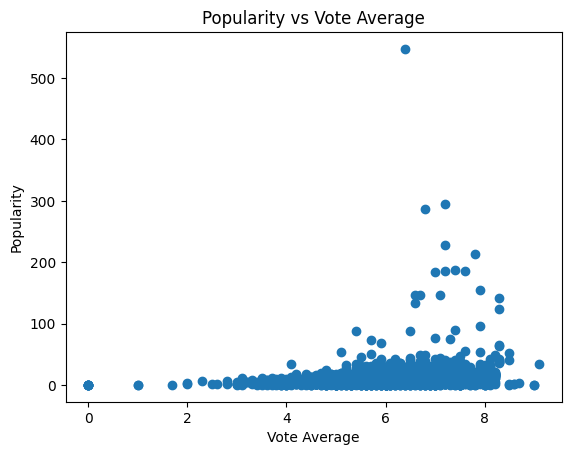

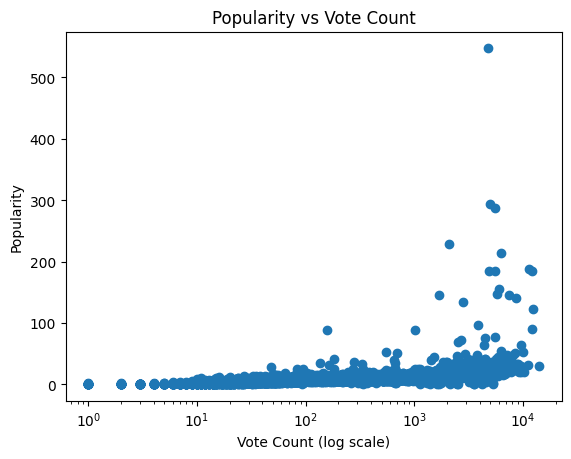

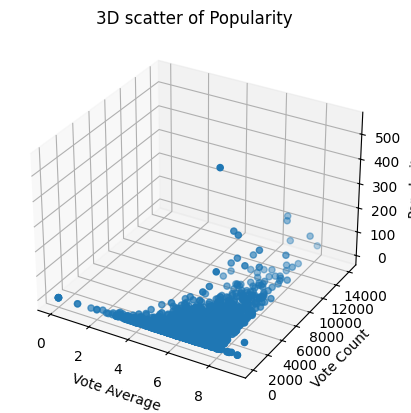

Regression intercept: 4.968110625157147
Coefficient for Vote Average: 0.15256061320640524
Coefficient for Vote Count: 0.005252732540525941


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Load your data
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 18.xlsx')

# 2. Correlation matrix
corr = df[['Vote Average', 'Vote Count', 'Popularity']].corr()
print("Correlation matrix:\n", corr, "\n")

# 3. Scatter‑plots
#   a) Vote Average vs Popularity
plt.figure()
plt.scatter(df['Vote Average'], df['Popularity'])
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Popularity vs Vote Average')
plt.show()

#   b) Vote Count vs Popularity (log scale on Vote Count)
plt.figure()
plt.scatter(df['Vote Count'], df['Popularity'])
plt.xscale('log')
plt.xlabel('Vote Count (log scale)')
plt.ylabel('Popularity')
plt.title('Popularity vs Vote Count')
plt.show()

#   c) 3D-ish view: Vote Average & Vote Count colored by Popularity
#      (just to get a feel—optional)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Vote Average'], df['Vote Count'], df['Popularity'])
ax.set_xlabel('Vote Average')
ax.set_ylabel('Vote Count')
ax.set_zlabel('Popularity')
plt.title('3D scatter of Popularity')
plt.show()

# 4. Simple multiple linear regression
#    to see if Popularity ≈ a*(Vote Average) + b*(Vote Count) + c
X = df[['Vote Average', 'Vote Count']].fillna(0)
y = df['Popularity'].fillna(0)

model = LinearRegression()
model.fit(X, y)

print("Regression intercept:", model.intercept_)
print("Coefficient for Vote Average:", model.coef_[0])
print("Coefficient for Vote Count:", model.coef_[1])


R² = 0.230


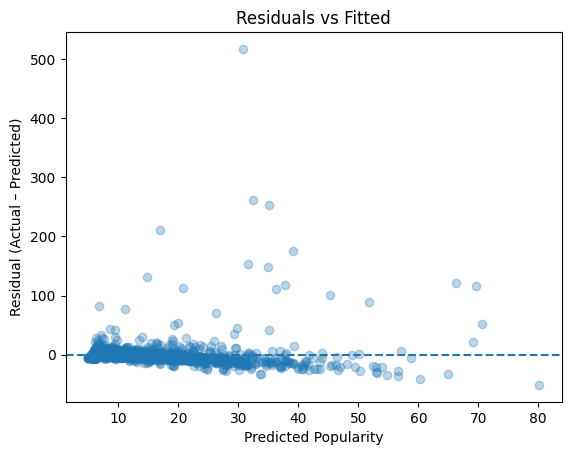

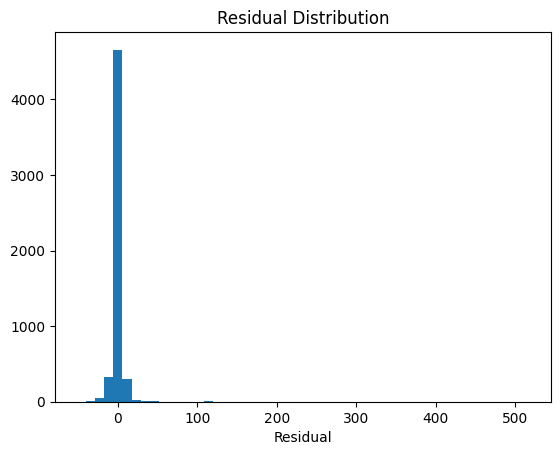

In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# assuming model, X, y from before

# 1. R-squared
r2 = model.score(X, y)
print(f"R² = {r2:.3f}")

# 2. Residuals
y_pred = model.predict(X)
resid = y - y_pred

plt.figure()
plt.scatter(y_pred, resid, alpha=0.3)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residual (Actual – Predicted)')
plt.title('Residuals vs Fitted')
plt.show()

# 3. Histogram of residuals
plt.figure()
plt.hist(resid, bins=50)
plt.xlabel('Residual')
plt.title('Residual Distribution')
plt.show()


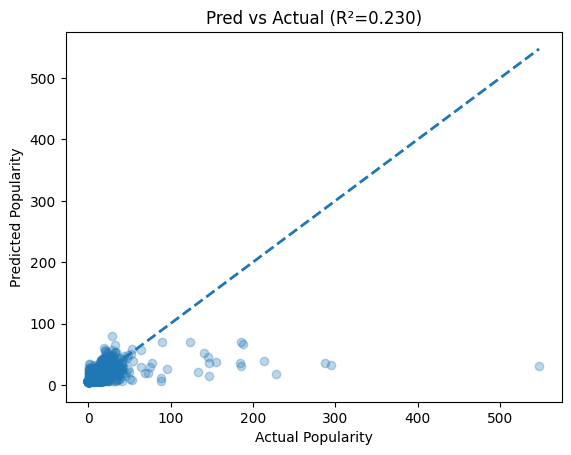

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# assume X, y and model from before
y_pred = model.predict(X)

# 1. Predicted vs Actual
plt.figure()
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title(f'Pred vs Actual (R²={r2_score(y, y_pred):.3f})')
plt.show()


In [ ]:
import pandas as pd

# 1. Read in Movies 16
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 18.xlsx')

# 2. Rename the three columns
df = df.rename(columns={
    'Vote Average': 'IMDb Rating',
    'Vote Count':   'IMDb Votes',
    'Popularity':   'IMDb Advanced Rating'
})

# 3. Save to a new file
df.to_excel('/content/drive/My Drive/Colab Notebooks/804 Capstone/Movies 19.xlsx', index=False)

# 4. Show the updated columns
print(df.columns.tolist())


['Title', 'Language', 'Country', 'Studio', 'Series or not', 'Series', 'Director', 'Lead Actor', '2nd Actor', '3rd Actor', 'IMDb ID', 'IMDb Rating', 'IMDb Votes', 'IMDb Advanced Rating', 'Runtime', 'Release Date', 'Budget', 'Revenue', 'ID']
